# MLR Model

In [3]:
# Import libraries here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import datetime as dt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy import stats 
pd.set_option('display.max_columns', None)

%run ../assets/regression_metrics.py

|Predictive Variable|Data type|Description|
|:---|:---|:---|
|overall_qual|Scale of 1 to 10|Rates the overall material and finish of the house|
|full_bath|int|Full bathrooms above grade|
|year_built|int|Original construction date|
|gr_liv_area_log|log of square feet|Log of above grade (ground) living area square feet|
|neighborhood_price_high|0 or 1|Is the neighborhood one standard deviation above the mean price per square feet of the total data set|
|neighborhood_price_low|0 or 1|Is the neighborhood one standard deviation below the mean price per square feet of the total data set|
|has_pool|0 or 1|Does the home have a pool|
|ms_zoning_FV|0 or 1|Is the property in a Floating Village Residential Zone|
|ms_zoning_RL|0 or 1|Is the property in a Residential Low Density Zone|
|ms_zoning_RM|0 or 1|Residential Medium Density|
|exter_cond|Ordinal 1 to 5|Evaluates the present condition of the material on the exterior|
|lot_area_log|log of square feet|Lot size|
|bed_bath_ratio|float|Ratio between number of bedrooms to number of bathrooms|
|garage_qual_cars|float|Interaction between the quality of the garage and the number of cars it fits|
|bsmt_qual|Ordinal 1 to 5|Evaluates the height of the basement|
|has_remodel|0 or 1|Was the property recently remodeled|""

### 1. Read in data

In [4]:
# load in train clean data from my pickle
train = pickle.load(open("../assets/train_clean_model.pkl", "rb"))

In [5]:
# load in kaggle test clean data from my pickle
kaggle_test = pickle.load(open("../assets/test_clean.pkl", "rb"))

In [6]:
# remove outliers for properties with square feet above 4000
train = train[train["gr_liv_area"] < 4000]

In [7]:
# take the log of sale price
train["saleprice_log"] = np.log(train["saleprice"])

Take a log of my predictors that have a strong correlation > 0.7 with sale price

In [8]:
# take the log of living area square feet
train["gr_liv_area_log"] = np.log(train["gr_liv_area"])

Set up our X and y variables

In [9]:
#starting with these variables that I selected from my correlation matrix in EDA
features = ["overall_cond", "overall_qual", 
            "full_bath", "bedroom_abvgr", 
            "has_remodel", "year_built" , 
            "gr_liv_area", "central_air", 
            "fireplaces", "has_pool"]

In [12]:
# set up X and y variables
X = train[features]
y = train["saleprice_log"]

### 2 . Split our data into test and train. 
- Will keep the default split at 75% train and 25% test since I have a relatively big data set.

In [13]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 123)

### 3. Fit a linear regression model

In [14]:
# instatiate model
lr = LinearRegression() 

# fit model on test and trianing data
lr.fit(X_train, y_train)
lr.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 4. Generate Predictions

In [15]:
# predictitions on training split
y_pred = lr.predict(X_train)

# predictions on test split
y_pred_test = lr.predict(X_test)

### 5. Evaluate my model

In [16]:
# Train score
lr.score(X_train, y_train)

0.8402278286897407

In [17]:
# Test score
lr.score(X_test, y_test)

0.8538921146766344

In [18]:
# Cross validation score
cross_val_score(lr, X_train, y_train, cv = 5).mean()

0.840492596674786

In [19]:
# get a summary of regression metrics. This is a custom function I created in ./assets/regression_metrics.py
regression_metrics(X_train, y_train, y_pred)

,index,Model Based on overall_cond overall_qual full_bath bedroom_abvgr has_remodel year_built gr_liv_area central_air fireplaces has_pool
0,MAE,0.12
1,MSE,0.03
2,RSS,41.91
3,RMSE,0.17
4,R Squared,0.84
5,Adjusted R Squared,0.84


In [20]:
# summary of regression metrics for test split
regression_metrics(X_test, y_test, y_pred_test)

,index,Model Based on overall_cond overall_qual full_bath bedroom_abvgr has_remodel year_built gr_liv_area central_air fireplaces has_pool
0,MAE,0.12
1,MSE,0.02
2,RSS,12.27
3,RMSE,0.15
4,R Squared,0.85
5,Adjusted R Squared,0.85


Plot the predicted sale prices against the actual sale price.

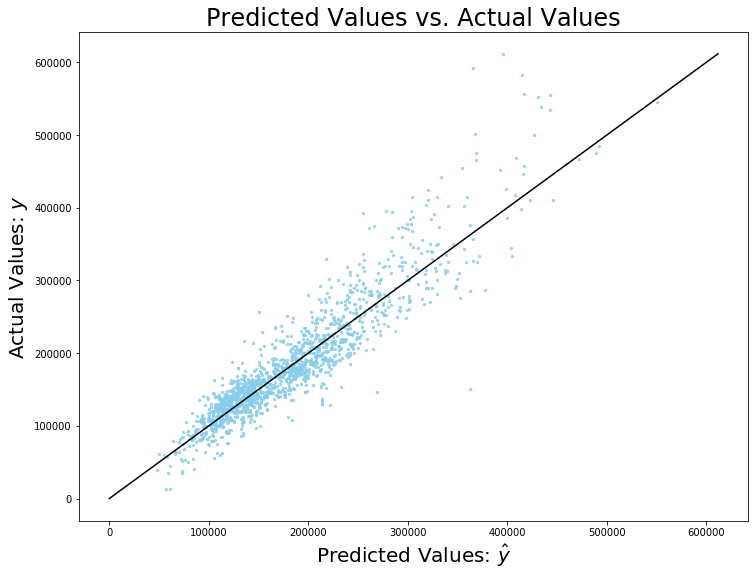

In [21]:
# Code from 3.01-lesson-linear_regression 
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(np.exp(y_pred), np.exp(y_train), s=5, color='skyblue', alpha = 0.8)

# Plot a line.
plt.plot([0, np.exp(np.max(y))],
         [0, np.exp(np.max(y))],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

I see my predictions spread out more after around $300,000. My model is not good at predicting higher priced homes.

### 6. Run model on Kaggle test data

Set up X and y variables on Kaggle test dataset

In [278]:
# get the log of general living area
kaggle_test["gr_liv_area_log"] = np.log(kaggle_test["gr_liv_area"])

In [279]:
# set my X variable
X_kaggle = kaggle_test[features]

In [281]:
# generate predictions
y_preds = np.exp(lr.predict(X_kaggle))

In [131]:
# create a pandas dataframe for my predictions
submission = pd.DataFrame(y_preds, index=kaggle_test.index, columns=['SalePrice'])

In [132]:
# sort by index
submission.sort_index(inplace=True)

### Write out submission

In [111]:
# write to csv
submission.to_csv("../datasets/submission_mlr_8.csv")

# Try polyfeatures

### 1. Set up polynomial variables

In [92]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(include_bias = False)

In [112]:
# Create X_poly
X_poly = poly.fit_transform(X)
#X_kaggle_poly = poly.fit_transform(X_kaggle)
X_poly

array([[6.000e+00, 2.000e+00, 1.976e+03, ..., 1.000e+00, 4.000e+00,
        1.600e+01],
       [7.000e+00, 2.000e+00, 1.996e+03, ..., 1.000e+00, 3.000e+00,
        9.000e+00],
       [5.000e+00, 1.000e+00, 1.953e+03, ..., 1.000e+00, 5.000e+00,
        2.500e+01],
       ...,
       [6.000e+00, 1.000e+00, 1.928e+03, ..., 1.000e+00, 3.000e+00,
        9.000e+00],
       [4.000e+00, 1.000e+00, 1.956e+03, ..., 1.000e+00, 5.000e+00,
        2.500e+01],
       [7.000e+00, 2.000e+00, 1.999e+03, ..., 1.000e+00, 4.000e+00,
        1.600e+01]])

In [94]:
# View X_poly in a DataFrame
pd.DataFrame(X_poly, columns = poly.get_feature_names(features))

,overall_qual,full_bath,year_built,gr_liv_area,1st_flr_sf,neighborhood_price_high,neighborhood_price_low,ms_zoning_FV,ms_zoning_RL,ms_zoning_RM,exter_qual,exter_cond,kitchen_abvgr,housing_stock,overall_qual^2,overall_qual full_bath,overall_qual year_built,overall_qual gr_liv_area,overall_qual 1st_flr_sf,overall_qual neighborhood_price_high,overall_qual neighborhood_price_low,overall_qual ms_zoning_FV,overall_qual ms_zoning_RL,overall_qual ms_zoning_RM,overall_qual exter_qual,overall_qual exter_cond,overall_qual kitchen_abvgr,overall_qual housing_stock,full_bath^2,full_bath year_built,full_bath gr_liv_area,full_bath 1st_flr_sf,full_bath neighborhood_price_high,full_bath neighborhood_price_low,full_bath ms_zoning_FV,full_bath ms_zoning_RL,full_bath ms_zoning_RM,full_bath exter_qual,full_bath exter_cond,full_bath kitchen_abvgr,full_bath housing_stock,year_built^2,year_built gr_liv_area,year_built 1st_flr_sf,year_built neighborhood_price_high,year_built neighborhood_price_low,year_built ms_zoning_FV,year_built ms_zoning_RL,year_built ms_zoning_RM,year_built exter_qual,year_built exter_cond,year_built kitchen_abvgr,year_built housing_stock,gr_liv_area^2,gr_liv_area 1st_flr_sf,gr_liv_area neighborhood_price_high,gr_liv_area neighborhood_price_low,gr_liv_area ms_zoning_FV,gr_liv_area ms_zoning_RL,gr_liv_area ms_zoning_RM,gr_liv_area exter_qual,gr_liv_area exter_cond,gr_liv_area kitchen_abvgr,gr_liv_area housing_stock,1st_flr_sf^2,1st_flr_sf neighborhood_price_high,1st_flr_sf neighborhood_price_low,1st_flr_sf ms_zoning_FV,1st_flr_sf ms_zoning_RL,1st_flr_sf ms_zoning_RM,1st_flr_sf exter_qual,1st_flr_sf exter_cond,1st_flr_sf kitchen_abvgr,1st_flr_sf housing_stock,neighborhood_price_high^2,neighborhood_price_high neighborhood_price_low,neighborhood_price_high ms_zoning_FV,neighborhood_price_high ms_zoning_RL,neighborhood_price_high ms_zoning_RM,neighborhood_price_high exter_qual,neighborhood_price_high exter_cond,neighborhood_price_high kitchen_abvgr,neighborhood_price_high housing_stock,neighborhood_price_low^2,neighborhood_price_low ms_zoning_FV,neighborhood_price_low ms_zoning_RL,neighborhood_price_low ms_zoning_RM,neighborhood_price_low exter_qual,neighborhood_price_low exter_cond,neighborhood_price_low kitchen_abvgr,neighborhood_price_low housing_stock,ms_zoning_FV^2,ms_zoning_FV ms_zoning_RL,ms_zoning_FV ms_zoning_RM,ms_zoning_FV exter_qual,ms_zoning_FV exter_cond,ms_zoning_FV kitchen_abvgr,ms_zoning_FV housing_stock,ms_zoning_RL^2,ms_zoning_RL ms_zoning_RM,ms_zoning_RL exter_qual,ms_zoning_RL exter_cond,ms_zoning_RL kitchen_abvgr,ms_zoning_RL housing_stock,ms_zoning_RM^2,ms_zoning_RM exter_qual,ms_zoning_RM exter_cond,ms_zoning_RM kitchen_abvgr,ms_zoning_RM housing_stock,exter_qual^2,exter_qual exter_cond,exter_qual kitchen_abvgr,exter_qual housing_stock,exter_cond^2,exter_cond kitchen_abvgr,exter_cond housing_stock,kitchen_abvgr^2,kitchen_abvgr housing_stock,housing_stock^2
0,6.0,2.0,1976.0,1479.0,725.0,0.0,1.0,0.0,1.0,0.0,4.0,3.0,1.0,4.0,36.0,12.0,11856.0,8874.0,4350.0,0.0,6.0,0.0,6.0,0.0,24.0,18.0,6.0,24.0,4.0,3952.0,2958.0,1450.0,0.0,2.0,0.0,2.0,0.0,8.0,6.0,2.0,8.0,3904576.0,2922504.0,1432600.0,0.0,1976.0,0.0,1976.0,0.0,7904.0,5928.0,1976.0,7904.0,2187441.0,1072275.0,0.0,1479.0,0.0,1479.0,0.0,5916.0,4437.0,1479.0,5916.0,525625.0,0.0,725.0,0.0,725.0,0.0,2900.0,2175.0,725.0,2900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,3.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,3.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,16.0,12.0,4.0,16.0,9.0,3.0,12.0,1.0,4.0,16.0
1,7.0,2.0,1996.0,2122.0,913.0,0.0,0.0,0.0,1.0,0.0,4.0,3.0,1.0,3.0,49.0,14.0,13972.0,14854.0,6391.0,0.0,0.0,0.0,7.0,0.0,28.0,21.0,7.0,21.0,4.0,3992.0,4244.0,1826.0,0.0,0.0,0.0,2.0,0.0,8.0,6.0,2.0,6.0,3984016.0,4235512.0,1822348.0,0.0,0.0,0.0,1996.0,0.0,7984.0,5988.0,1996.0,5988.0,4502884.0,1937386.0,0.0,0.0,0.0,2122.0,0.0,8488.0,6366.0,2122.0,6366.0,833569.0,0.0,0.0,0.0,913.0,0.0,3652.0,2739.0,913.0,2739.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

### 2. Split data into test and train

In [95]:
# split data into train and test
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, random_state= 123)

### 3. Fit a linear regression model

In [96]:
lr = LinearRegression()
lr.fit(X_poly_train, y_poly_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 4. Evaluate model

In [97]:
# cross validation score
cross_val_score(lr, X_poly_train, y_poly_train, cv = 5).mean()

0.8821275947124183

In [98]:
# Train score
lr.score(X_poly_train, y_poly_train)

0.9282372868907023

In [99]:
# Test score
lr.score(X_poly_test, y_poly_test)

0.8788715214649198

Model is overfit to my training data when using poly features.

# Run a statsmodel

In [78]:
# create a constant for X in SM
X_train_sm = sm.add_constant(X_train) 


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [79]:
model_sm = sm.OLS(y_train, X_train).fit() # instantiate and fit model

In [80]:
# generate predictions
y_pred_sm = model_sm.predict(X_train)

In [82]:
# model summary
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          saleprice_log   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.094e+05
Date:                Tue, 14 Jan 2020   Prob (F-statistic):                        0.00
Time:                        16:09:33   Log-Likelihood:                          773.71
No. Observations:                1533   AIC:                                     -1497.
Df Residuals:                    1508   BIC:                                     -1364.
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
overall_qual                0.0602      0.005     11.863      0.000       0.050       0.070
full_bath                  -0.0423      0.011     -3.880      0.000      -0.064      -0.021
year_built                  0.0054   2.95e-05    182.815      0.000       0.005       0.005
gr_liv_area                 0.0004    1.6e-05     26.015      0.000       0.000       0.000
1st_flr_sf                  0.0001    1.5e-05      7.314      0.000    8.01e-05       0.000
neighborhood_price_high     0.1665      0.013     12.740      0.000       0.141       0.192
neighborhood_price_low     -0.2060      0.013    -15.435      0.000      -0.232      -0.180
ms_zoning_FV                0.0428      0.036      1.178      0.239      -0.028       0.114
ms_zoning_RL                0.0567      0.031      1.845      0.065      -0.004       0.117
ms_zoning_RM                0.0806      0.031      2.595      0.010       0.020       0.142
exter_qual                 -0.0156      0.010     -1.520      0.129      -0.036       0.005
exter_cond                  0.0999      0.010      9.702      0.000       0.080       0.120
kitchen_abvgr               0.0012      0.021      0.056      0.955      -0.039       0.042
housing_stock               0.0110      0.004      2.731      0.006       0.003       0.019
lot_area                 3.502e-06   6.06e-07      5.777      0.000    2.31e-06    4.69e-06
bedroom_abvgr              -0.0078      0.009     -0.899      0.369      -0.025       0.009
bath_bed_ratio             -0.0494      0.021     -2.308      0.021      -0.091      -0.007
condition_1_Artery          0.0260      0.023      1.152      0.250      -0.018       0.070
condition_1_Feedr          -0.0106      0.017     -0.615      0.539      -0.045       0.023
condition_1_PosA            0.0711      0.047      1.508      0.132      -0.021       0.164
condition_1_PosN            0.0448      0.032      1.407      0.160      -0.018       0.107
condition_1_RRAe           -0.0686      0.040     -1.719      0.086      -0.147       0.010
condition_1_RRAn            0.0025      0.029      0.087      0.931      -0.054       0.059
condition_1_RRNe           -0.0675      0.104     -0.646      0.518      -0.272       0.137
condition_1_RRNn           -0.0073      0.074     -0.099      0.921      -0.152       0.138
==============================================================================
Omnibus:                      596.614   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12595.433
Skew:                          -1.295   Prob(JB):                         0.00
Kurtosis:                      16.801   Cond. No.                     3.44e+05
=============

### Try this model on kaggle test data

In [294]:
# set up my X variable
X_kaggle_sm = sm.add_constant(X_kaggle) 

# generate predictions
y_preds = np.exp(model_sm.predict(X_kaggle_sm))

# create submissions dataframe
submission = pd.DataFrame(y_preds, index=kaggle_test.index, columns=['SalePrice'])
submission.sort_index(inplace=True)

In [289]:
# write to csv
submission.to_csv("../datasets/submission_mlr_9.csv")